# (1) Libraries and files Section



***Libraries and packages***

In [1]:
#Importing all the libraries that we are going to need in this assignment

#Pandas

import pandas as pd
from pandas import read_csv
import csv

#Numpy
import numpy  as np


#Uncomment these lines if you want to se only 2 digits after comma

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
np.seterr(invalid='ignore')

#Matplotlib

import matplotlib
import matplotlib.pyplot as plt

#Sklearn

import sklearn
from sklearn import preprocessing 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

#math

from math import sqrt

#timeit

import timeit

#warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



The given dataset is in this [link](https://drive.google.com/file/d/1VUn2WKkKeRXwH02K9bqH98KjPxrUmgXh/view)

# (2) Functions

***Useful Functions***

In [2]:
#Function to create the matrix X (m x n) and the y column vector. 
def get_dataset(train_set):

  columns=[]
  for row in train_set.iterrows():
    for column in row:
      columns.append(column)
  
  X_matrix = np.array([])
  y_features = np.array([])
  # X_matrix = ([1,1,1,1,1,1,1,1])
  X_matrix = np.ones( (train_set.shape[1]) - 1 )

  for i in columns[1::2]:
    vector = np.array([])
    vector = np.append(vector,i)
  
    y_features = np.append(y_features,vector[-1])
    vector = np.delete(vector,-1)
    X_matrix = np.vstack([X_matrix, vector])

  X_matrix = np.delete(X_matrix,  [0] , axis=0)
  y_features = np.array([y_features]).T

  return X_matrix, y_features

# def get_dataset_plusones(train_set):

#   columns=[]
#   for row in train_set.iterrows():
#     # columns.append(1)
#     for column in row:
#       # x=column
#       columns.append(column)
  
#   X_matrix = np.array([])
#   # vector = np.array([])
#   y_features = np.array([])
#   X_matrix = ([1,1,1,1,1,1,1,1,1])
  
#   for i in columns[1::2]:
#     vector = np.array([1])
#     vector = np.append(vector,i)
  
#     y_features = np.append(y_features,vector[-1])
#     vector = np.delete(vector,-1)
#     X_matrix = np.vstack([X_matrix, vector])

#   X_matrix = np.delete(X_matrix,  [0] , axis=0)
#   y_features = np.array([y_features]).T

#   return X_matrix, y_features


#Some feature engineering 
def medIncDataset(X_Matrix):

  MATRIX = np.array([])

  for row in X_Matrix:
    medInc   = row[0]
    # age   = row[1]
    # Age   = 1/row[1]
    # Rooms = row[2]
    # Beds  = row[3]
    # n4    = row[4]
    # n5    = row[5]
    # latitude      = row[6]
    # longtitude    = abs(row[7])
    Feature       = medInc

    # Feature = n0+age+Rooms+Beds+n4+n5+n6+n7
    # Feature= Age*Rooms*Beds
    MATRIX = np.append(MATRIX, Feature)

  Reg_Matrix = np.array([MATRIX]).T
  return Reg_Matrix

#Showing how the MSE behaves, after an reasonable amount of iterations
def plot_error_progress(error_list):

  iter_array  = ([])
  error_array = ([])
  for i in range(len(error_list)):
    error_array = np.append(error_array, error_list[i])
    iter_array  = np.append(iter_array, i)


  plt.plot(iter_array, error_array)
  plt.xlabel('Iterations')
  plt.ylabel('MSE')

#Learning Curves to visually see if we have overfitting/underfitting
def plot_Learning_Curves(RMSE_train, RMSE_test ):

  train_error = ([])
  train_iter  = ([])
  test_error  = ([])
  test_iter   = ([])

  for i in range(len(RMSE_train)):
    
    train_error = np.append( train_error, RMSE_train[i])
    train_iter  = np.append( train_iter, i)

    test_error  = np.append( test_error , RMSE_test[i])
    test_iter  = np.append( test_iter, i)

  plt.plot(train_iter, train_error, 'r')
  plt.plot(test_iter, test_error, 'b')
  plt.xlabel('Batch Size')
  plt.ylabel('RMSE')
  plt.title('Blue = test | Red = train')

#Function to create Learning Curves - Useful to visually see if our model is overfitting/underfitting
def LearningCurves(main_Set , theta, clf , alpha='Batch', seter="main"):

  # print(seter)
  train_set = main_Set[0]
  test_set  = main_Set[2]
  
  y_train   = main_Set[1]
  if(alpha=="SGD"):
    y_train = y_train.astype('int')
  
  y_test    = main_Set[3]

  size  = len(test_set)
  train = train_set[:size]
  val   = test_set[:size]

  step = int(size/10)

  RMSE_train_list = []
  RMSE_test_list  = []
  
  pred_list = []
  for i in range(step,size,step):
    
    train_pair_array  = np.array([])
    test_pair_array   = np.array([])

    if(alpha=="SGD"):
      y_pred_train  = SGDPredict(main_Set, i , clf , 'y_train')
      y_pred_test   = SGDPredict(main_Set, i , clf, 'y_test')
    else:
      theta, error_list = gradientDescent(train[:i], y_train[:i])
      y_pred_train  = predict(train[:i] , theta, seter)
      y_pred_test   = predict(val[:i] , theta, seter)

    RMSE_train        = RMSE(y_train[:i], y_pred_train)
    train_pair_array  = np.append(train_pair_array , RMSE_train)

    RMSE_test         = RMSE(y_test[:i], y_pred_test)
    test_pair_array   = np.append(test_pair_array, RMSE_test)

    RMSE_train_list.append( train_pair_array )
    RMSE_test_list.append( test_pair_array )

  return RMSE_train_list, RMSE_test_list

#Print given r2 score
def r2score(test_set, y_test, theta, set="main"):

  if(set=="updated"):
    y_predict = predict(test_set,theta, "updated")
  else:
    y_predict = predict(test_set, theta)

  y_true    = y_test
  y_pred    = y_predict

  print("R2 Score is: ", r2_score(y_true, y_pred),"\n")

# function to compute predictions created for the current dataset
# where y = w0 + w1*x1 +...+w8*x8 
def predict(X, theta, set="main"):

  if(set=="updated"):
    pred = np.dot(X, theta[0:1]) + theta[1]
  else:
    pred = np.dot(X, theta[0:8]) + theta[8]
  
  return pred

# function to compute MSE
def cost(X, y, theta): 
    h = np.dot(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J[0] 

# function to compute gradient of (M.S.E) error 
def gradient(X, y, theta): 
    h = np.dot(X, theta) 
    grad = (2/X.shape[0])*np.dot(X.transpose(), (h - y)) 
    return grad 

# function to perform mini-batch gradient descent
# def gradientDescent(X, y, learning_rate = 0.1, steps=1000): 
def gradientDescent(X, y, learning_rate = 0.0008, steps=1000): 
    theta_list = []
    X = np.c_[ X, np.ones(X.shape[0]) ]                                         #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1], 1))                                           #create inital weights w0, w1..wd
    error_list = []  
    for s in range(steps):
      theta = theta - learning_rate * gradient(X, y, theta) 
      error_list.append(cost(X, y, theta))                                      #useful for plotting changes when using different batch sizes
      theta_list.append(theta)

    return theta, error_list 

def learning_schedule(t):
  
  t0, t1 = 5, 50                                                                # Learning schedule hyperparameters
  return t0 / (t + t1)

# function to perform Stohastic Gradient Descent, based on: Hands-On, Machine Learning with Scikit-Learn
def SGD(X, y, n_epochs=1):

  m = len(X)                                                                    # Number of training set
  X = np.c_[ X, np.ones(X.shape[0]) ]                                           # add a column of ones to X for the bias term
  thetai = np.random.randn(9,1)                                                 # random initialization
  error_list = []
  theta_list = []
  # eta = 0.00000001

  for epoch in range(n_epochs):
    for i in range(m):
      random_index = np.random.randint(m)
       
      xi  = X[random_index:random_index+1]
      yi  = y[random_index:random_index+1]
      gradients = 2*xi.T.dot(xi.dot(thetai) - yi)
      eta = learning_schedule(epoch * m + i)
      thetai = thetai - eta * gradients
      error_list.append(cost(X,y,thetai))
      theta_list.append(thetai)
      
  return error_list, thetai

# function to perform Stohastic Gradient Descent, based on: SGDClassifier from sklearn

def SGDClassification(main_Set, epochs):

  print(epochs)
  clf = SGDClassifier(loss='hinge', penalty='l1', max_iter=epochs)

  X_train = main_Set[0]
  y_train = main_Set[1]
  y_train = y_train.astype('int')
  
  clf.fit(X_train,y_train.ravel());

  return clf

def SGDPredict(main_Set, batch, classifier, predictable):

  X_test  = main_Set[2][:batch]
  X_train = main_Set[0][:batch]

  if (predictable == 'y_train'):
    y_pred = classifier.predict(X_train)
  else:
    y_pred = classifier.predict(X_test)

  return y_pred

def RMSE(y_true, y_pred):
  
  rmse = sqrt(mean_squared_error(y_true, y_pred))
  return rmse


def unison_shuffled_copies(a, b):
  assert len(a) == len(b)
  p = np.random.permutation(len(a))
  return a[p], b[p]

def MiniBatches(main_Set, size, seter="main"):

  train_size  = (len(main_Set[0]))
  step        = int(train_size/size)
  previous_step = 0

  temp_Set = main_Set
  
  temp_Set[0], temp_Set[1] = unison_shuffled_copies(temp_Set[0],temp_Set[1])
  temp_Set[2], temp_Set[3] = unison_shuffled_copies(temp_Set[2],temp_Set[3])


  X = np.c_[ temp_Set[0][previous_step:step], np.ones(temp_Set[0][previous_step:step].shape[0]) ]                 #add a column of ones to X for the bias term
  theta = np.zeros((X.shape[1], 1))                                           #create inital weights w0, w1..wd
  error_list = []  
  learning_rate = 0.1
  steps = 1000

  for i in range(step,train_size,step):

    X = np.c_[ temp_Set[0][previous_step:i], np.ones(temp_Set[0][previous_step:i].shape[0]) ]                                         #add a column of ones to X for the bias term
    y = temp_Set[1][previous_step:i]

    for s in range(steps):
      theta = theta - learning_rate * gradient(X, y, theta) 
      error_list.append(cost(X, y, theta))                                      #useful for plotting changes when using different batch sizes

    previous_step = i  

  return theta, error_list

# (3) Loading and previewing the given dataset

In [3]:
#Will read the necessary .csv files

LocationCSV =r'/content/HousingData.csv'                  

housing = pd.read_csv(LocationCSV, low_memory=False)                            #Read csv file
housing = housing.loc[:, ~housing.columns.str.contains('^Unnamed')]             #Remove odd column
housing.head(15)                                                                #Show the first 15 attributes in our csv file
# housing.info()                                                                #Checkout if the # of attributes are the same

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609
5,3.4191,52.0,4.530612,0.816327,1107.0,11.295918,39.73,-121.85,1.375
6,8.7974,4.0,6.146119,0.972603,603.0,2.753425,33.68,-117.82,3.606
7,5.2124,9.0,5.329932,1.017007,675.0,2.295918,33.67,-117.81,1.996
8,3.4679,18.0,3.848394,1.060241,2192.0,2.200803,33.73,-117.98,2.197
9,4.8068,46.0,5.463878,1.011407,607.0,2.307985,37.55,-122.32,3.697


# (4) Data Preprocessing, Data Correlation, Feature Engineering & Improving Models:

In the next cell we intend to do some data preprocessing, and also in this notebook, we are going to see in practice, how the correlation between our data, can help us **improve** our predictions, and also **reduce** as much as possible the errors.

In this part, we must make clear the fact that the label that we want to predict is (ofcourse) the **Median House Value**. Take as an example that you are working in a big real estate company, and there is a client that he wants to sold his house. He wants to know how much his house is worth. Ofcourse in real-life, there are many variables we must consider before setting a price, i.e: sqft, age of the house, number of rooms, location , etc. 

Then, you come to this **dillema**: If you set the price too high maybe no one is willing to buy this house, but if you set the price too low, maybe you wont make the best profit (and you will also lose your job). Here comes the art of Machine Learning and Data Science: Given an Input of specific attributes, such as HouseAge, Average Rooms, etc, you can compute with high accurancy the best price for this house.

Let's visualise, how important is the **geographical position** of different houses in California Beach.
Below there is a photo of California Beach from Google Maps, and after there is a plot with the position of different houses and their Median House Value.
<!-- We already can see from the previous short preview of the given dataset that we have many columns to consider in the final features. At first glance, many of can see some correlations already in our data, i.e MedInc and the Medi -->

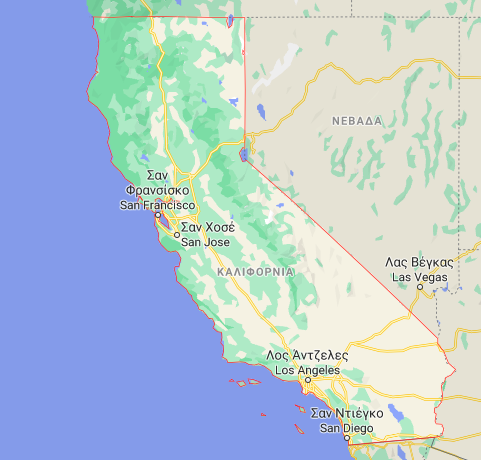

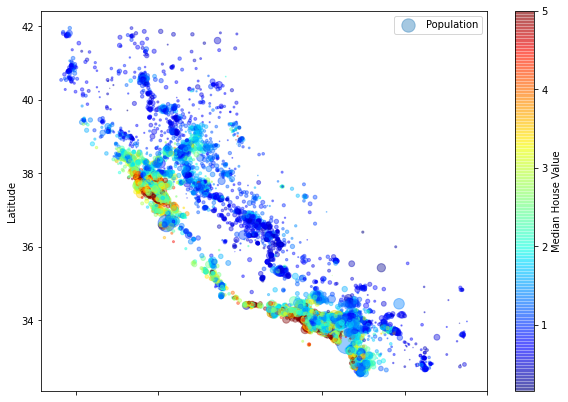

In [4]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=housing["Population"]/100, label="Population", figsize=(10,7),
c="Median House Value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

We can see that the **most expensive** houses are near the sea. So the first rule we can put in the list is that: The closer the house is to the sea, the more expensive it gets. 

See, the problem is that that's not always true, because what if a new house was built, but 40km far from the sea? We can't overlook the fact that the house is completely new (and thus the price for a big brand new house will be high), and set the price low , just because it's not near the beach.

Howover, in this assignment we are going to simplify this problem. Considering the previous short preview of the dataset, some of us will observe that maybe we have a bond between the **Median Income and the Median House Value**. Let's also plot this observation:

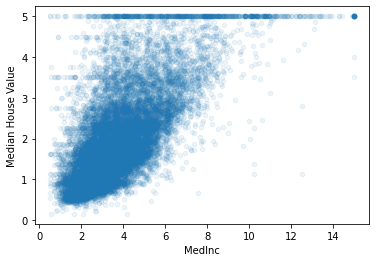

In [5]:
housing.plot(kind="scatter", x="MedInc", y="Median House Value",
alpha=0.08)

Indeed, (besides this strait line in the top of the plot), the bigger picture can't lie. As the Median Income of an area grows, so the Median House Value **grows too**.

**Nevertheless**, we can't rely in our instinct and take as granted that, that's the best correlation we can find in this dataset. It is better to see some more correlation between our features (thanks to Scikit-Learn, we have already the tools to do this easily and not by hand).

In [6]:
corr_matrix = housing.corr()
corr_matrix["Median House Value"].sort_values(ascending=False)

Median House Value    1.000000
MedInc                0.683619
AveRooms              0.148807
HouseAge              0.103891
Population           -0.025447
AveOccup             -0.028013
AveBedrms            -0.040525
Longitude            -0.050616
Latitude             -0.141712
Name: Median House Value, dtype: float64

As we can see, the **indisputable winner** of this race, is Median Income. Yet, this fact doesen't mean that we can rest and finish the feature engineering part there, but for the needs of this assignment, we'll stick to this.

So, what we'll do is that we are going to split the dataset in 2 parts:


*   (1) ***Main Set***    :  Consider all the (8) columns of the dataset.
*   (2) ***Updated Set*** :  Consider only the Median Income as our feature.

*We'll see how much our predictions are going to change based on the previous facts.*

In [7]:
#Dividing our data into train and test set

train_set, test_set = train_test_split (housing, test_size=0.2, random_state=42)
# train_set.shape[1]

Now, let's take the train and test samples for both sets

In [8]:
#Creating X_matrix and y_features for either train and test set.

X_train_matrix , y_train_features = get_dataset(train_set)                      #We create the X matrix (n x m) and the y features (labels) for train
X_test_matrix , y_test_features = get_dataset(test_set)                         #We create the X matrix (n x m) and the y features (labels) for test

#Creating the first set with all the features
main_Set = []
main_Set.append(X_train_matrix)
main_Set.append(y_train_features)
main_Set.append(X_test_matrix)
main_Set.append(y_test_features)

print(X_train_matrix)
print("\n")
################################################################################

X2_train_matrix = medIncDataset(X_train_matrix)                                 #We create the X2 matrix (1 x m) and the y features (labels) for train
X2_test_matrix  = medIncDataset(X_test_matrix)                                  #We create the X2 matrix (1 x m) and the y features (labels) for test

updated_Set = []

updated_Set.append(X2_train_matrix)
updated_Set.append(y_train_features)                                            # y_features ofcourse remains the same, on train and test
updated_Set.append(X2_test_matrix)
updated_Set.append(y_test_features)

print(X2_train_matrix)

[[1.85 48.00 4.75 ... 5.01 34.02 -118.24]
 [4.07 19.00 61.81 ... 2.33 39.01 -120.06]
 [4.28 33.00 5.51 ... 2.72 33.81 -117.94]
 ...
 [3.06 13.00 4.31 ... 2.17 34.04 -117.67]
 [3.01 25.00 4.91 ... 2.90 34.17 -117.31]
 [2.52 35.00 6.24 ... 2.76 34.13 -117.25]]


[[1.85]
 [4.07]
 [4.28]
 ...
 [3.06]
 [3.01]
 [2.52]]


With a quick look, we can see that the features are somewhat ..apart. So we must do some **feature scaling** before we move on.





In [9]:
for i in range(len(main_Set)):
  if( (i%2)==0 ):
    main_Set[i] = preprocessing.scale(main_Set[i])

for i in range(len(updated_Set)):
  if( (i%2)==0 ):
    updated_Set[i] = preprocessing.scale(updated_Set[i])

print(X_train_matrix)
print("\n")
print(main_Set[0])
print("\n ============================================== \n")
print(X2_train_matrix)
print("\n")
print(updated_Set[0])

[[1.85 48.00 4.75 ... 5.01 34.02 -118.24]
 [4.07 19.00 61.81 ... 2.33 39.01 -120.06]
 [4.28 33.00 5.51 ... 2.72 33.81 -117.94]
 ...
 [3.06 13.00 4.31 ... 2.17 34.04 -117.67]
 [3.01 25.00 4.91 ... 2.90 34.17 -117.31]
 [2.52 35.00 6.24 ... 2.76 34.13 -117.25]]


[[-1.06 1.54 -0.26 ... 0.38 -0.76 0.67]
 [0.11 -0.75 21.96 ... -0.12 1.58 -0.24]
 [0.22 0.35 0.04 ... -0.05 -0.86 0.82]
 ...
 [-0.42 -1.23 -0.43 ... -0.15 -0.75 0.95]
 [-0.45 -0.28 -0.20 ... -0.02 -0.69 1.13]
 [-0.70 0.51 0.32 ... -0.04 -0.71 1.16]]


[[1.85]
 [4.07]
 [4.28]
 ...
 [3.06]
 [3.01]
 [2.52]]


[[-1.06]
 [0.11]
 [0.22]
 ...
 [-0.42]
 [-0.45]
 [-0.70]]


It's obvious the difference now. Much better and more clean dataset to play now with. Time to use Linear Regression Model to do our predictions, using:


1.   ***Batch Gradient Descent***
2.   ***Stohastic Gradient Descent***
3.   ***Mini-Batch Gradient Descent***



# (5) Linear Regression Model and optimization of **theta** parameter.

## (5.1): Main Set, using all 8 features.


### (5.1.1): **Batch Gradient Descent.**

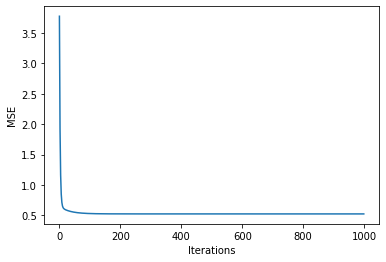

In [10]:
theta , error_list = gradientDescent( main_Set[0] , main_Set[1], learning_rate=0.1, steps=1000)               #We apply batch-Gradient-Descent (Linear Reggresion)
plot_error_progress(error_list)                                             

We can see that we find the best possible **theta** after ~100 iterations. The MSE after these iterations remains the same and does not changes at all.

Now, the main part of this process is to compute how **good** our model is. To do that, we'll use from now and then, a simple yet but efficient metric provided by sklearn: [R2 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [11]:
r2score(main_Set[2], main_Set[3], theta)

R2 Score is:  0.5938473453604336 



And finally, we'll see if our model is Overfitting or Underfitting. A method that can compute this, is the [Learning Curves](https://www.dataquest.io/blog/learning-curves-machine-learning/). 

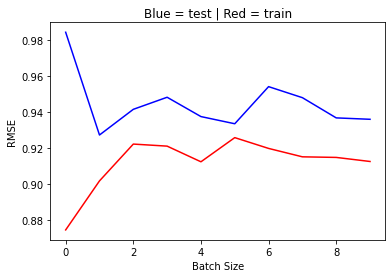

In [12]:
RMSE_train, RMSE_test = LearningCurves(main_Set, theta, 0)
plot_Learning_Curves(RMSE_train,RMSE_test)

We can clearly see that these learning curves are representing a classic case for a model that's neither overfitting or underfitting.

### (5.1.2): **Stochastic Gradient Descent**

The main idea with SGD, is that this method can be used in an online setting, where new data are coming in one at a time , or offline , where we cycle through the same data as many times as is necessary, taking a step after considering each single example.

Stochastic gradient descent, is **much faster** that batch gradient descent and it can work effectively with **huge training datasets** since only one training instance needs to be in memory at a time. We'll use the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.partial_fit), by sklearn.

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SGD = SGDClassification(main_Set,1000)

1000


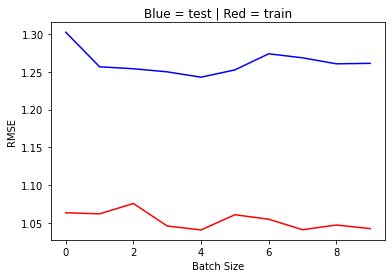

In [14]:
RMSE_train, RMSE_test = LearningCurves(main_Set, 0 , SGD, 'SGD');
plot_Learning_Curves(RMSE_train,RMSE_test);

Above, we can see how our model behaves with the increasing tendency of the Training Set Size (Batche Size). 

Our model is clearly overfitting (The train RMSE error starts way below the test RMSE error, and as the Batches are increasing, the 2 lines are getting close to each other, but there is always this **huge gap** between them , which testifies the fact of overfitting)

### (5.1.3): **Mini-Batch Gradient Descent**

Now, we saw both ***Batch GD*** and ***SGD***.
If we observe the figures carefully, we can say with safety that the Batch Gradient Descent works more effectively than SGD.

*So what?* We why can't use Batch GD all the time ? (besides the fact that SGD can be used in online learning and insert new data, "on the fly").

We live in the Big Data season, and our features will be (in the best case), approximately near to ~10^6.
That means that we want to take advantage of the SGD **speedness** , but we also want our model to be as **effective** as Batch GD.

A middle-ground solution, is to use the [Mini-Batch Gradient Descent](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/). The main idea is that, in parallel programming, we can take advantage of the **GPUs** and do the same type of calculations fast, thus, we can get a performance boost from hardware optimazation of matrix operations.

With that being said, let's implement this algorithm.



R2 Score is:  0.5792276306812911 



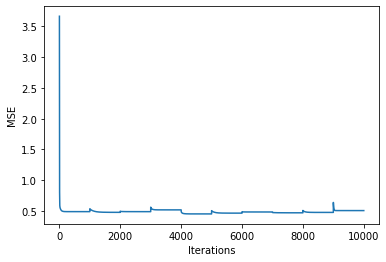

In [15]:
Batches_size = 10     #User can change this parameter
theta, error_list = MiniBatches(main_Set,Batches_size)
plot_error_progress(error_list)
r2score(main_Set[2],main_Set[3],theta,"main")

As we can see, the mini-batches method, has some ups and lows, but eventually it computes the optimum theta, and after 10.000 iterations( size*1000 steps) , it finally converges.

In the end, we can say that the mini-batch GD is faster if we're using some sort of parallel power, but the R2 score for the mini-batch, isn't the best, but still it's a good one.

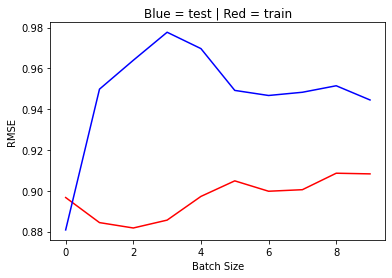

In [16]:
RMSE_train, RMSE_test = LearningCurves(main_Set, theta , 0);
plot_Learning_Curves(RMSE_train,RMSE_test);

## (5.2): Updated set, using only 1 feature.

### (5.2.1): **Batch Gradient Descent**

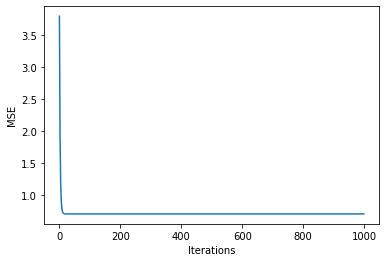

In [17]:
theta , error_list = gradientDescent( updated_Set[0] , updated_Set[1], learning_rate=0.1, steps=1000)               #We apply batch-Gradient-Descent (Linear Reggresion)
plot_error_progress(error_list)   

Here, it's not so clear but in the updated set, we found the optimum theta, in less than ~**25(!)** iterations.

In [18]:
r2score(updated_Set[2], updated_Set[3], theta, 'updated')

R2 Score is:  0.45768070976640085 



And now let's see the learning Curves:

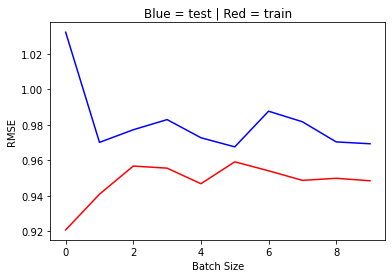

In [19]:
RMSE_train, RMSE_test = LearningCurves(updated_Set, theta, 0, "","updated" )
plot_Learning_Curves(RMSE_train,RMSE_test)

Unfortunatelly, our model is overfitting. And That's happening because we choose poorly our features. We ought to find a better correlation between the datasets.

## (5.2.2): **Stochastic Gradient Descent**

1000


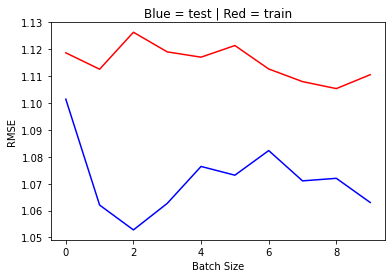

In [20]:
SGD = SGDClassification(updated_Set,1000)
RMSE_train, RMSE_test = LearningCurves(updated_Set, 0 , SGD, 'SGD');
plot_Learning_Curves(RMSE_train,RMSE_test);

And ofcourse, we are also overfitting with SGD.

### (5.2.3): **Mini-Batch Gradient Descent**

In [21]:
Batches_size = 10     #User can change this parameter
theta, error_list = MiniBatches(updated_Set,Batches_size, 'updated')
r2score(updated_Set[2], updated_Set[3], theta, 'updated')

R2 Score is:  0.45715933670463627 



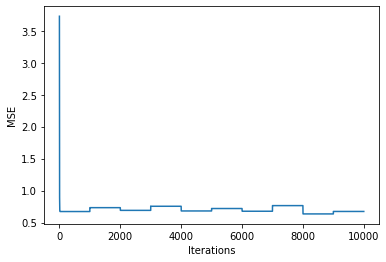

In [22]:
plot_error_progress(error_list)

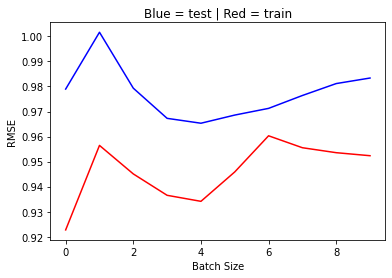

In [23]:
RMSE_train, RMSE_test = LearningCurves(updated_Set, theta, 0, "", 'updated');
plot_Learning_Curves(RMSE_train,RMSE_test);